In [1]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
path = "/home/braingeneers/Documents/NeuroTechSCPersonalUse/Data/2025-04-29/neural_data_20250429_1435_block_(0).mat"
mat = loadmat(path)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'neural_data', 'cursor_trajectory', 'duration', 'trial_start_times', 'trial_end_times', 'cue', 'metadata'])

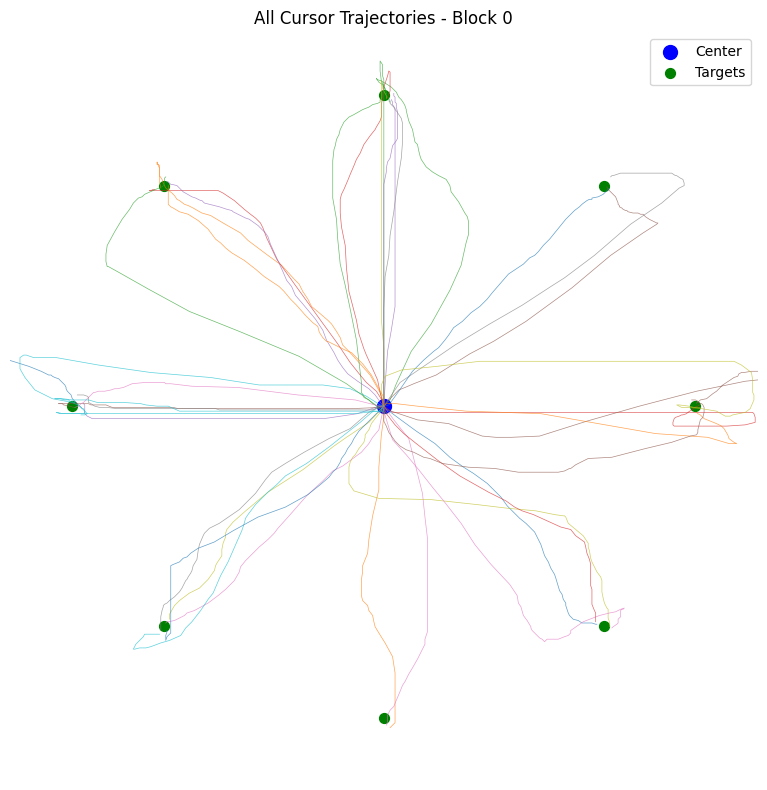

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from datetime import datetime

# Construct the expected filename
filename = path

# Define the center and radius of the radial 8 task
center_x = 450
center_y = 350
radius = 250

# Compute the target locations
targets_x = []
targets_y = []
for i in range(8):
    angle = np.radians(i * 45)
    x = center_x + radius * np.cos(angle)
    y = center_y + radius * np.sin(angle)
    targets_x.append(x)
    targets_y.append(y)

try:
    # Load the saved data
    mat = scipy.io.loadmat(filename)

    # Create a single plot
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(center_x - radius - 50, center_x + radius + 50)
    plt.ylim(center_y - radius - 50, center_y + radius + 50)
    plt.scatter(center_x, center_y, marker='o', color='blue', s=100, label='Center')
    plt.scatter(targets_x, targets_y, marker='o', color='green', s=50, label='Targets')

    # Plot all trajectories
    for i, trial_data in enumerate(mat['cursor_trajectory']):
        trial = trial_data[0]
        if trial.size > 0:
            x = trial[:, 0]
            y = trial[:, 1]
            plt.plot(x, y, linewidth=0.5, alpha=0.7)  # Plot each trajectory

    plt.title(f"All Cursor Trajectories - Block {filename[-6]}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found. Please ensure the block ID is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


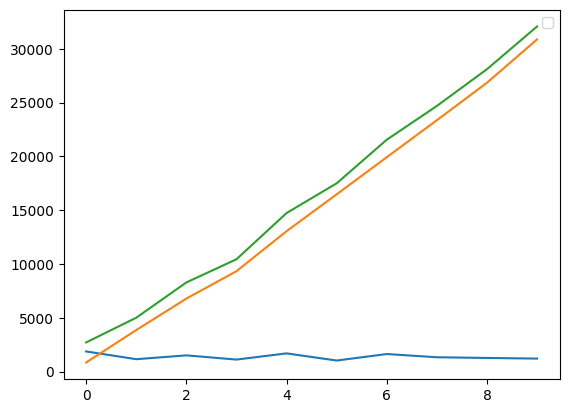

In [12]:
plt.plot(mat['duration'])
plt.plot(mat['trial_start_times'])
plt.plot(mat['trial_end_times'])
plt.legend()